# 대중교통 데이터 프로젝트

## 대중교통 데이터 시각화하기 

In [2]:
#지하철 데이터 정제 확인 
import csv
f =open('subwayfee.csv', encoding ='949')
data = csv.reader(f)

for row in data :
    print(row)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2019-01', '1호선', '0150', '서울역', '1516452', '1400464', '221180', '211764']
['2019-01', '1호선', '0151', '시청', '676932', '676266', '102388', '101033']
['2019-01', '1호선', '0152', '종각', '1240810', '1177643', '162410', '152062']
['2019-01', '1호선', '0153', '종로3가', '703110', '674148', '387062', '362735']
['2019-01', '1호선', '0154', '종로5가', '571824', '583955', '275447', '263687']
['2019-01', '1호선', '0155', '동대문', '308301', '342898', '134071', '138633']
['2019-01', '1호선', '0156', '신설동', '360561', '353834', '126466', '120147']
['2019-01', '1호선', '0157', '제기동', '293540', '288217', '374571', '400607']
['2019-01', '1호선', '0158', '청량리(서울시립대입구)', '463456', '482960', '352121', '357571']
['2019-01', '1호선', '0159', '동묘앞', '174683', '188711', '146034', '147551']
['2019-01', '2호선', '0201', '시청', '706097', '679503', '61058', '55387']
['2019-01', '2호선', '0202', '을지로입구', '1415414', '1414980', '120425', '111592']
['2019-01', '2호선', '0203', '을지로3가', 

In [4]:
#header 제외 -> next(data), data -> int
import csv
f =open('subwayfee.csv', encoding ='949')
data = csv.reader(f)
next(data)

for i in range(4,8):
    row[i] = int(row[i]
    print(row)

['2019-01', '우이신설선', '4713', '신설동', 37248, 40743, 19037, 17418]


### 유임 승차 비율이 제일 높은 역은 어디?

* 유임 승차 비율 구하는 식 
    : 유임승차인원/무임승차인원 
 
****
질문에 답을 구하는 알고리즘
1. 데이터 가져오기 
2. 데이터로 모든 역의 비율을 계산 
3. 비율이 가장 높은 역 찾기 

In [17]:
#유임 승차 비율이 제일 높은 역 찾기 
import csv
f=open('subwayfee.csv',encoding='949')
data = csv.reader(f)
next(data)

mx = 0
rate = 0 


for row in data:
    for i in range(4,8):
        row[i]=int(row[i]) #데이터 정수화 
    if row[6]!= 0: #무임승차 0 피하기
        rate = row[4]/row[6] #유임승차 비율 (유임승차/무임승차)
        if rate > mx:
            mx=rate #최대치 넣기
            print(row, round(rate,2))

['2019-01', '1호선', '0150', '서울역', 1516452, 1400464, 221180, 211764] 6.86
['2019-01', '1호선', '0152', '종각', 1240810, 1177643, 162410, 152062] 7.64
['2019-01', '2호선', '0201', '시청', 706097, 679503, 61058, 55387] 11.56
['2019-01', '2호선', '0202', '을지로입구', 1415414, 1414980, 120425, 111592] 11.75
['2019-01', '2호선', '0209', '한양대', 233785, 256079, 15380, 16652] 15.2
['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 16.91
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 20.48
['2019-01', '3호선', '0321', '충무로', 55, 0, 2, 0] 27.5


In [25]:
#유임 승차 비율 수식 변동
import csv
f=open('subwayfee.csv',encoding='949')
data = csv.reader(f)
next(data)

mx=0
rate=0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[6] != 0 and (row[4]+row[6])>100000:
        rate = row[4]/(row[4]+row[6])
        if rate>0.94:
            mx=rate
            print(row,round(rate,2))

['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95
['2019-01', '경부선', '1001', '서울역', 178223, 29980, 10325, 1612] 0.95
['2019-01', '9호선', '4125', '신논현', 965930, 995451, 57013, 54557] 0.94
['2019-01', '공항철도 1호선', '4203', '홍대입구', 336328, 335507, 17545, 17112] 0.95
['2019-01', '공항철도 1호선', '4206', '마곡나루', 133488, 119389, 8060, 8192] 0.94
['2019-01', '공항철도 1호선', '4207', '김포공항', 300654, 196229, 18640, 14332] 0.94
['2019-01', '공항철도 1호선', '4210', '청라국제도시', 174320, 164483, 9921, 9676] 0.95


In [28]:
#유임 승차 비율이 가장 높은 역 찾기 

import csv
f = open('subwayfee.csv', encoding='949')
data = csv.reader(f)
next(data)

mx = 0 
rate = 0
max_station = ''

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[6] != 0 and (row[4]+row[6])>100000:
        rate = row[4]/(row[4]+row[6])
        if rate > mx :
            mx = rate
            max_station = row[3] + ' ' + row[1]
print(max_station,round(mx*100,2))

홍대입구 2호선 95.34


### 유무임 승하차 인원이 가장 많은 역은 어디? 
***
1. 데이터 불러오기 
2. 모든 역의 데이터를 바탕으로 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원이 가장 많은 역 찾기 
3. 각각의 인원이 가장 많은 역 출력
*** 
* 4가지 종류의 데이터를 알아봐야하기 때문에 저장할 공간 4개가 필요함 
* 각각 필요한 정보들이 리스트 안에 순서대로 저장 되어 있으니 -> 리스트와 반복문 사용

In [35]:
#유무임 승하차 인원이 가장 많은 역 찾기 

import csv
f = open('subwayfee.csv', encoding='949')
data = csv.reader(f)
next(data)

#리스트에 공간 4개 확보 
mx=list(0 for i in range(0,4))
mx_station = list('' for i in range(0,4)) 
#label 
label = ['유임승차','유임하자','무임승차','무임하자']

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
        #각 row mx 리스트에 넣기
        if row[i] > mx[i-4]:
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]
for i in range(4):
    print(label[i]+' : '+mx_station[i],mx[i])
                       

유임승차 : 강남 2호선 3153418
유임하자 : 강남 2호선 3210437
무임승차 : 종로3가 1호선 387062
무임하자 : 제기동 1호선 400607


### 모든 역의 유무임 승하차 비율은 어떻게 될까 ?
***
파이차트 사용하자! 

유임승차 : 강남 2호선 3153418
유임하자 : 강남 2호선 3210437
무임승차 : 종로3가 1호선 387062
무임하자 : 제기동 1호선 400607


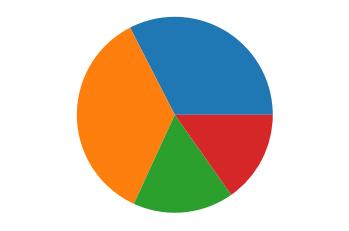

In [36]:
import csv
f = open('subwayfee.csv', encoding='949')
data = csv.reader(f)
next(data)

#리스트에 공간 4개 확보 
mx=list(0 for i in range(0,4))
mx_station = list('' for i in range(0,4)) 
#label 
label = ['유임승차','유임하자','무임승차','무임하자']

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
        #각 row mx 리스트에 넣기
        if row[i] > mx[i-4]:
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]
for i in range(4):
    print(label[i]+' : '+mx_station[i],mx[i])
    
    
#파이차트로 확인하기
import matplotlib.pyplot as plt
plt.pie(row[4:8])
plt.axis('equal')
plt.show()

In [41]:
#파이차트에 정보 더 추가하기
import csv
f = open('subwayfee.csv', encoding='949')
data = csv.reader(f)
next(data)

#리스트에 공간 4개 확보 
mx=list(0 for i in range(0,4))
mx_station = list('' for i in range(0,4)) 
#label 
label = ['유임승차','유임하자','무임승차','무임하자']

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
        #각 row mx 리스트에 넣기
        if row[i] > mx[i-4]:
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]
for i in range(4):
    print(label[i]+' : '+mx_station[i],mx[i])
    
    
#파이차트로 확인하기

import matplotlib.pyplot as plt
c =['#14CCC0','#389993','#FF1C6A','#CC14AF']
plt.rc('font', family ='AppleGothic')
for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    plt.figure(dpi=300)
    plt.title(row[3]+ ' '+row[1])
    plt.pie(row[4:8],labels=label, colors = c, autopct = '%1.f%%')
    plt.axis('equal')
    plt.show()


유임승차 : 강남 2호선 3153418
유임하자 : 강남 2호선 3210437
무임승차 : 종로3가 1호선 387062
무임하자 : 제기동 1호선 400607


In [84]:
#모든 역의 유무임 승하차 비율을 파이 차트로 나타내기
import csv
f = open('subwayfee.csv', encoding='949')
data = csv.reader(f)
next(data)
label = ['유임승차','유임하자','무임승차','무임하자']

import matplotlib.pyplot as plt
c =['#14CCC0','#389993','#FF1C6A','#CC14AF']
plt.rc('font', family ='AppleGothic')
for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    plt.figure(dpi=300)
    plt.title(row[3]+ ' '+row[1])
    plt.pie(row[4:8],labels=label, colors = c, autopct = '%1.f%%')
    plt.axis('equal')
    #이미지 파일 저장하기 
    #plt.savefig(row[3]+ '' +row[1]+'.png')
    plt.show()

## 지하철 시간대별 데이터 시각화하기 

### 지하철 시간대별 이용 현황 데이터 정제하기

In [43]:
#데이터 불러오기 
import csv 
f = open('subwaytime.csv', encoding = '949')
data = csv.reader(f)
for row in data:
    print(row)

['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '']
['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차']
['2019-01', '1호선', '150', '서울역', '927', '22', '10682', '8774', '1

In [44]:
#데이터 전처리
import csv
f = open('subwaytime.csv', encoding ='949')
data = csv.reader(f)
next(data)
next(data)
for row in data:
    #map() 함수 사용 - 일괄적으로 데이터에 특정 함수를 적용할 수 있음
    #첫 인자에 일괄 적용할 함수 이름을 입력, 두 번째 인자에는 그 함수를 적용할 데이터 입력
    row[4:] = map(int,row[4:])
    print(row)

['2019-01', '1호선', '150', '서울역', 927, 22, 10682, 8774, 13504, 45545, 39110, 103863, 80492, 236747, 61108, 163026, 68446, 86198, 89100, 80051, 98021, 85869, 101282, 91792, 86627, 86386, 113919, 87211, 118223, 91594, 161216, 98032, 249973, 105075, 142575, 77807, 97729, 55056, 96955, 46680, 70982, 35481, 33149, 19442, 3612, 7167, 0, 410, 0, 0, 0, 0]
['2019-01', '1호선', '151', '시청', 74, 0, 2409, 4049, 3532, 19241, 7703, 66876, 9978, 209349, 12818, 88793, 16470, 49343, 22512, 45645, 26040, 41405, 34728, 46800, 40497, 40429, 51586, 34787, 54591, 29029, 80258, 28534, 170225, 28331, 76142, 15634, 57394, 9141, 58745, 8204, 38156, 6345, 14478, 4079, 981, 1256, 3, 29, 0, 0, 0, 0]
['2019-01', '1호선', '152', '종각', 100, 8, 4409, 5105, 4593, 26969, 6733, 104259, 11028, 300081, 14563, 167611, 20165, 80474, 34617, 76633, 42088, 71920, 59893, 75678, 68149, 62408, 84211, 57607, 96197, 55889, 144446, 63459, 257735, 83206, 134259, 51603, 113555, 19039, 135586, 12188, 111743, 8286, 54264, 5560, 4886, 1722, 0,

### 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까

In [46]:
#오전 7시 승차 인원 
import csv
f = open('subwaytime.csv', encoding = '949')
data = csv.reader(f)
next(data)
next(data) 
result=[]
for row in data: 
    row[4:] =map(int,row[4:])
    result.append(row[10])
print(len(result))
print(result)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

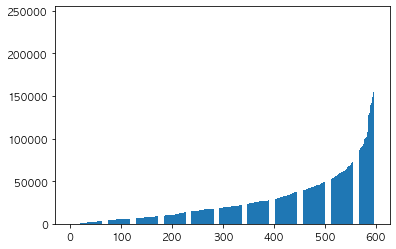

In [53]:
#오전 7시 승차 인원 막대 그래프로 구현하기 
import csv
f = open('subwaytime.csv', encoding = '949')
data = csv.reader(f)
next(data)
next(data) 
result=[]
for row in data: 
    row[4:] =map(int,row[4:])
    result.append(row[10])

import matplotlib.pyplot as plt
result.sort()
plt.bar(range(len(result)),result)
plt.show()

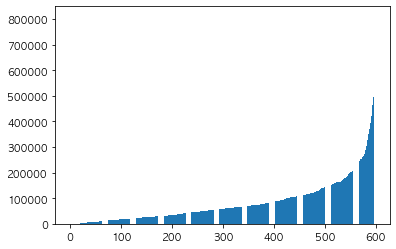

In [54]:
#7시~9시 승차 인원 막대 그래프로 구현하기 
import csv
f = open('subwaytime.csv', encoding = '949')
data = csv.reader(f)
next(data)
next(data) 
result=[]
for row in data: 
    row[4:] =map(int,row[4:])
    result.append(sum(row[10:15:2]))

import matplotlib.pyplot as plt
result.sort()
plt.bar(range(len(result)),result)
plt.show()

In [58]:
#3시간 (7~9시) 동안 80만 명이 들어오는 역은 어디?
import csv
f = open('subwaytime.csv', encoding='949')
data = csv.reader(f)
next(data)
next(data)
mx =0
max_station=''

for row in data:
    #정수 변환
    row[4:] = map(int, row[4:])
    #최댓값 찾기 
    if sum(row[10:15:2])>mx :
        mx = sum(row[10:15:2])
        max_station = row[3] + ' ' + row[1]
print(max_station, mx)
    

신림 2호선 809541


In [59]:
#퇴근 시간대(18~20시) 사람들이 가장 많이 타고 내리는 역 찾기 
import csv
f = open('subwaytime.csv', encoding='949')
data = csv.reader(f)
next(data)
next(data)
max = 0
max_station=''

for row in data :
    row[4:]= map(int,row[4:])
    if sum(row[31:37:2])>max:
        max = sum(row[31:37:2])
        max_station=row[3] + '' + row[1]
print(max_station, max)

홍대입구2호선 749006


### 밤 11시에 사람들이 가장 많이 타는 역은 어디?

In [61]:
#원하는 승차 시간대 함수 만들어서 찾아보기 
import csv
f = open('subwaytime.csv', encoding='949')
data = csv.reader(f)
next(data)
next(data)
max=0
max_station=''
t = int(input('원하는 승차 시간대 :'))

for row in data:
    row[4:] = map(int, row[4:])
    a = row[4+(t-4)*2]
    if a > max:
        max = a
        max_station = row[3] + ' ' + row[1]
print(max_station, max)
    

원하는 승차 시간대 :23
강남 2호선 145504


### 시간대별로 사람들이 가장 많이 타고 내리는 역은 어디일까

In [67]:
#시간대 별로 가장 많이 이용한 역 
import csv
f = open('subwaytime.csv', encoding='949')
data = csv.reader(f)
next(data)
next(data)

max=list(0 for i in range(0,24))
max_station=list('' for i in range(0,24))

for row in data:
    #정수 변환 
    row[4:] = map(int, row[4:])
    #
    for j in range(24):
        a = row[j*2+4]
        if a > max[j]:
            max[j] = a
            max_station[j] = row[3]
print(max_station)
print(max)

['구로', '홍대입구', '신림', '신림', '신림', '신림', '신림', '신림', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '성신여대입구(돈암)', '신방화']
[8418, 42966, 80407, 243083, 355172, 211286, 113830, 98765, 126159, 170216, 169097, 203483, 227268, 291623, 431115, 292521, 235489, 295326, 314609, 145504, 27203, 36, 3, 1]


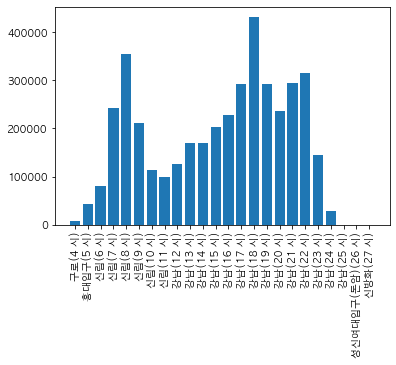

In [75]:
#시간대 별로 가장 많이 승차한 역 바 그래프로 표현하기 
import csv
f = open('subwaytime.csv', encoding='949')
data = csv.reader(f)
next(data)
next(data)

max=list(0 for i in range(0,24))
max_station=list('' for i in range(0,24))

for row in data:
    #정수 변환 
    row[4:] = map(int, row[4:])
    #시간대 별로 확인하기 
    for j in range(24):
        a = row[j*2+4]
        if a > max[j]:
            max[j] = a
            max_station[j] = row[3] + '('+str(j+4)+' 시)'

import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.bar(range(24),max)
plt.xticks(range(24),max_station, rotation=90)
plt.show()

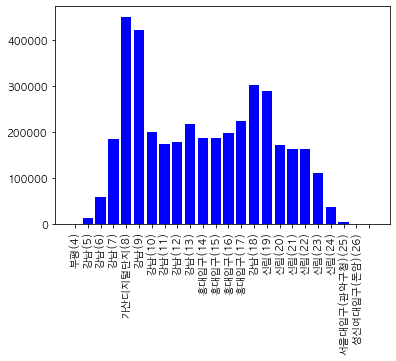

In [79]:
#시간대 별로 가장 많이 하차한 역 

import csv
import matplotlib.pyplot as plt

f=open('subwaytime.csv', encoding='949')
data = csv.reader(f)
next(data)
next(data)

max=list(0 for i in range(0,24))
max_station= list('' for i in range(0,24))

for row in data:
    row[4:] = map(int,row[4:])
    for j in range(24):
        b = row[5+j*2]
        if b >max[j]:
            max[j] = b
            max_station[j] = row[3] + '('+str(j+4)+')'
        
plt.rc('font', family='AppleGothic')
plt.bar(range(24), max, color='b')
plt.xticks(range(24),max_station, rotation=90)
plt.show()

### 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면

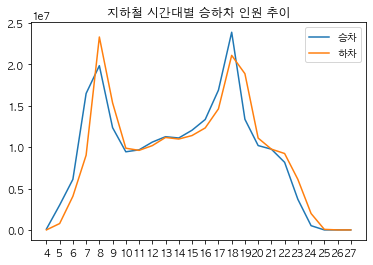

In [83]:
import csv
f = open('subwaytime.csv', encoding ='949')
data = csv.reader(f)
next(data)
next(data)

#24시간 승하차 인원 저장할 리스트 초기화 
s_in = list(0 for i in range(0,24))
s_out = list(0 for i in range(0,24))

#모든 시간대별 승하자 인원 누적해서 더하기
for row in data:
    row[4:] = map(int,row[4:])
    for i in range(24):
        s_in[i] += row[4+i*2]
        s_out[i] += row[5+i*2]
        
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in,label = '승차')
plt.plot(s_out,label = '하차')
plt.legend()
plt.xticks(range(24),range(4,28))
plt.show()